# **Phân tích đơn biến cho bộ dữ liệu thời tiết ERA5**

## I. Cài đặt và nhập các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# II. Tải và chuẩn bị dữ liệu

In [2]:
era5 = pd.read_csv('../Crawled Data/final_2016_2025_ERA5.csv')    
ndvi = pd.read_csv('../Crawled Data/final_2016_2025_NDVI.csv')


In [3]:
print(era5.columns)


Index(['NAME_1', 'GID_1', 'NAME_2', 'GID_2', 'date', '2m_temperature_mean',
       'total_precipitation_sum', 'total_evaporation_sum',
       'potential_evaporation_sum', 'volumetric_soil_water_layer_1_mean',
       'volumetric_soil_water_layer_2_mean', 'surface_pressure_mean',
       '10m_u_component_of_wind_mean', '10m_v_component_of_wind_mean',
       'surface_net_solar_radiation_sum',
       'surface_solar_radiation_downwards_sum'],
      dtype='object')


In [4]:
era5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479864 entries, 0 to 479863
Data columns (total 16 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   NAME_1                                 479864 non-null  object 
 1   GID_1                                  479864 non-null  object 
 2   NAME_2                                 479864 non-null  object 
 3   GID_2                                  479864 non-null  object 
 4   date                                   479864 non-null  object 
 5   2m_temperature_mean                    479864 non-null  float64
 6   total_precipitation_sum                479864 non-null  float64
 7   total_evaporation_sum                  479864 non-null  float64
 8   potential_evaporation_sum              479864 non-null  float64
 9   volumetric_soil_water_layer_1_mean     479864 non-null  float64
 10  volumetric_soil_water_layer_2_mean     479864 non-null  

In [5]:
len(sorted(era5['GID_2'].unique()))


133

In [6]:
len(sorted(ndvi['GID_2'].unique()))


133

# III. Exploratory Data Analysis

In [7]:
temp = era5.drop(columns=['NAME_1','NAME_2','GID_1','GID_2','date'])


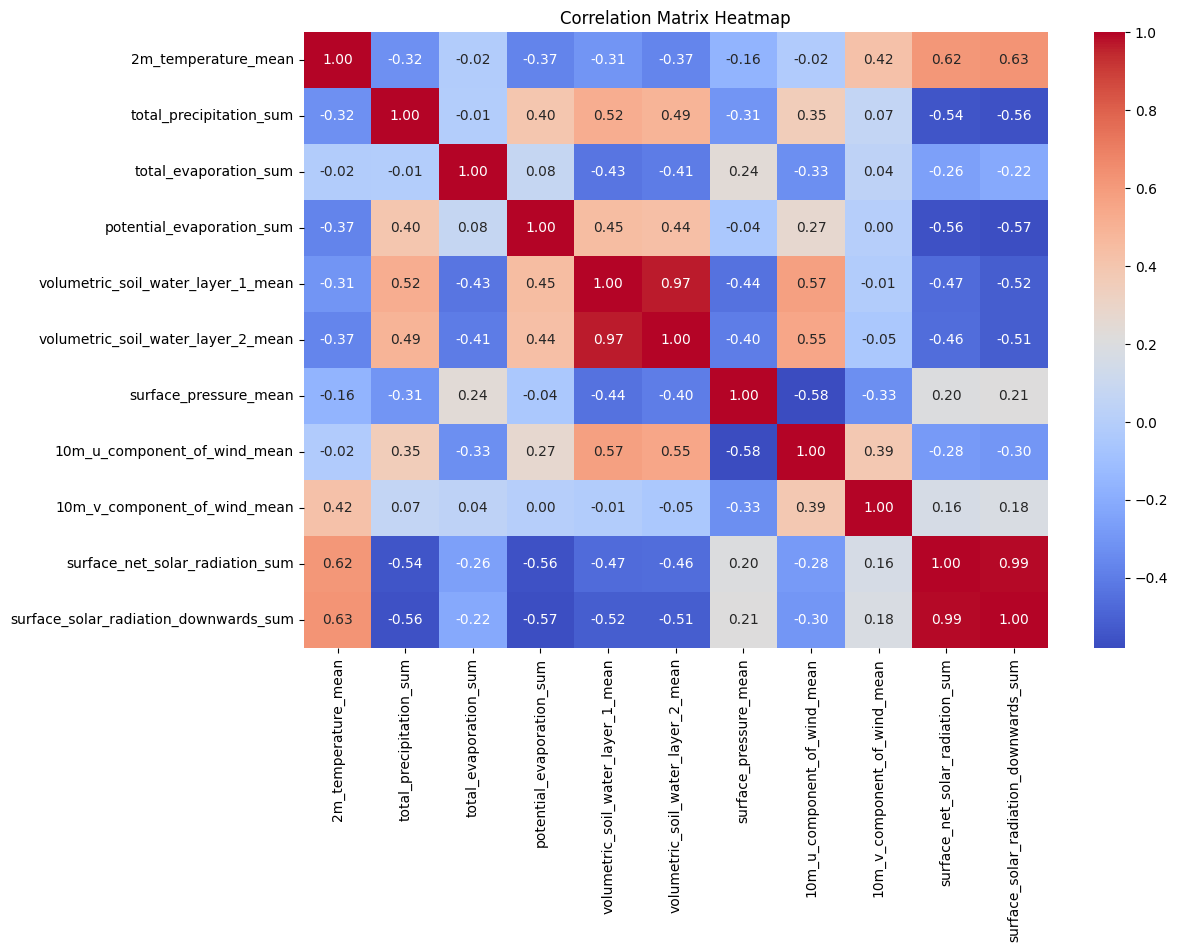

In [8]:
# Compute the correlation matrix
correlation_matrix = temp.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


## 1. Phân tích đơn biến

### a. Biến 'total_precipitation_sum'

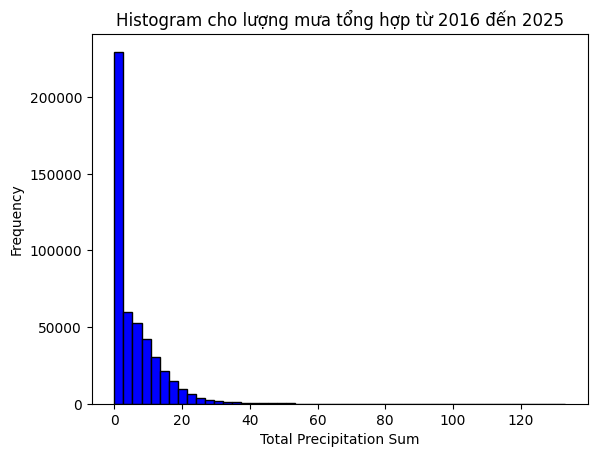

In [9]:
plt.hist(era5['total_precipitation_sum'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram cho lượng mưa tổng hợp từ 2016 đến 2025')
plt.xlabel('Total Precipitation Sum')
plt.ylabel('Frequency')
plt.show()


Trong suốt thời gian của bộ dữ liệu ( từ 1/1/2016 - 21/11/2025 ), chúng ta có thể thấy Đồng Bằng Sông Cửu Long thường tương đối ít mưa vì nằm trong vùng khí hậu nhiệt đới gió mùa, với mùa khô kéo dài từ tháng 11 đến tháng 4 và mùa mưa từ tháng 5 đến tháng 10. Tuy nhiên, trong những năm gần đây, do biến đổi khí hậu, các hiện tượng thời tiết cực đoan như mưa lớn đột ngột và lũ lụt đã trở nên phổ biến hơn.

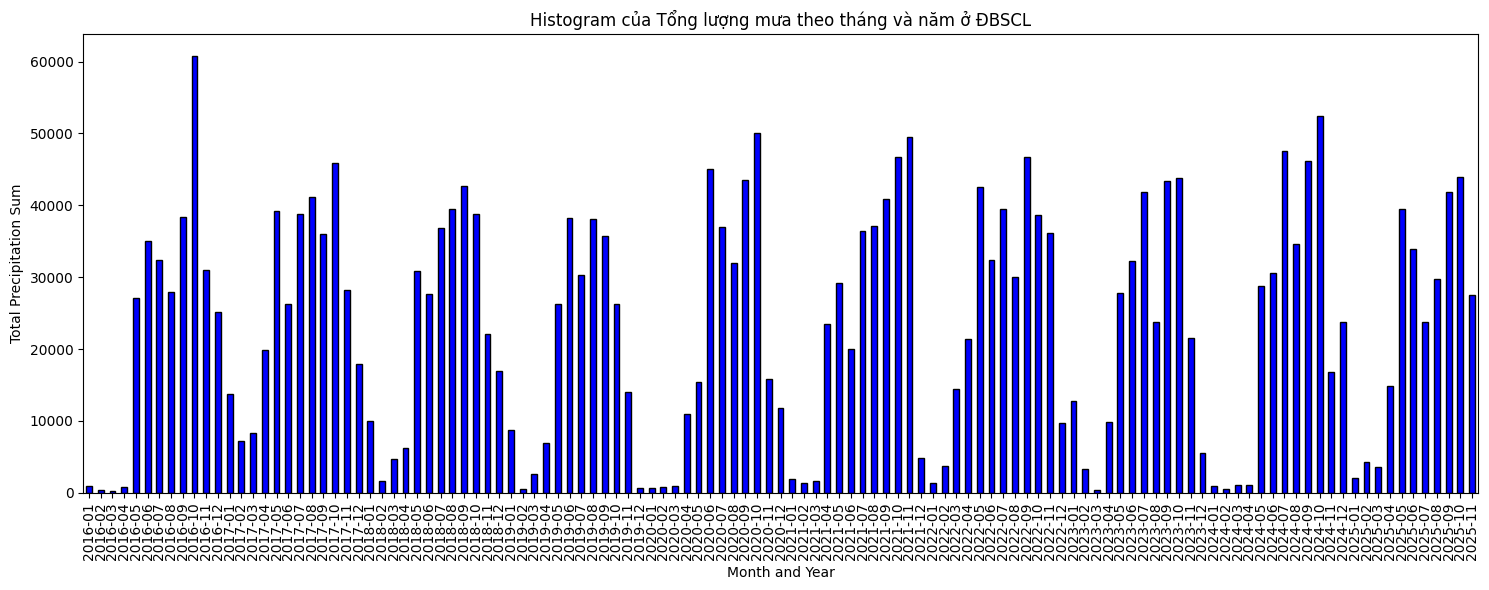

In [10]:
# Convert the 'date' column to datetime format
era5['date'] = pd.to_datetime(era5['date'])

# Extract year and month from the 'date' column
era5['year_month'] = era5['date'].dt.to_period('M')

# Group by year and month and calculate the sum of 'total_precipitation_sum'
monthly_precipitation = era5.groupby('year_month')['total_precipitation_sum'].sum()

# Plot the histogram
plt.figure(figsize=(15, 6))
monthly_precipitation.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Histogram của Tổng lượng mưa theo tháng và năm ở ĐBSCL')
plt.xlabel('Month and Year')
plt.ylabel('Total Precipitation Sum')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Tháng 10 năm 2016 đã có lượng mưa cao đột biến, có thể do ảnh hưởng của bão hoặc áp thấp nhiệt đới. Ngoài ra, các tháng 9 và 11 năm 2020 cũng ghi nhận lượng mưa cao, có thể liên quan đến các hiện tượng thời tiết như bão hoặc gió mùa Tây Nam mạnh.

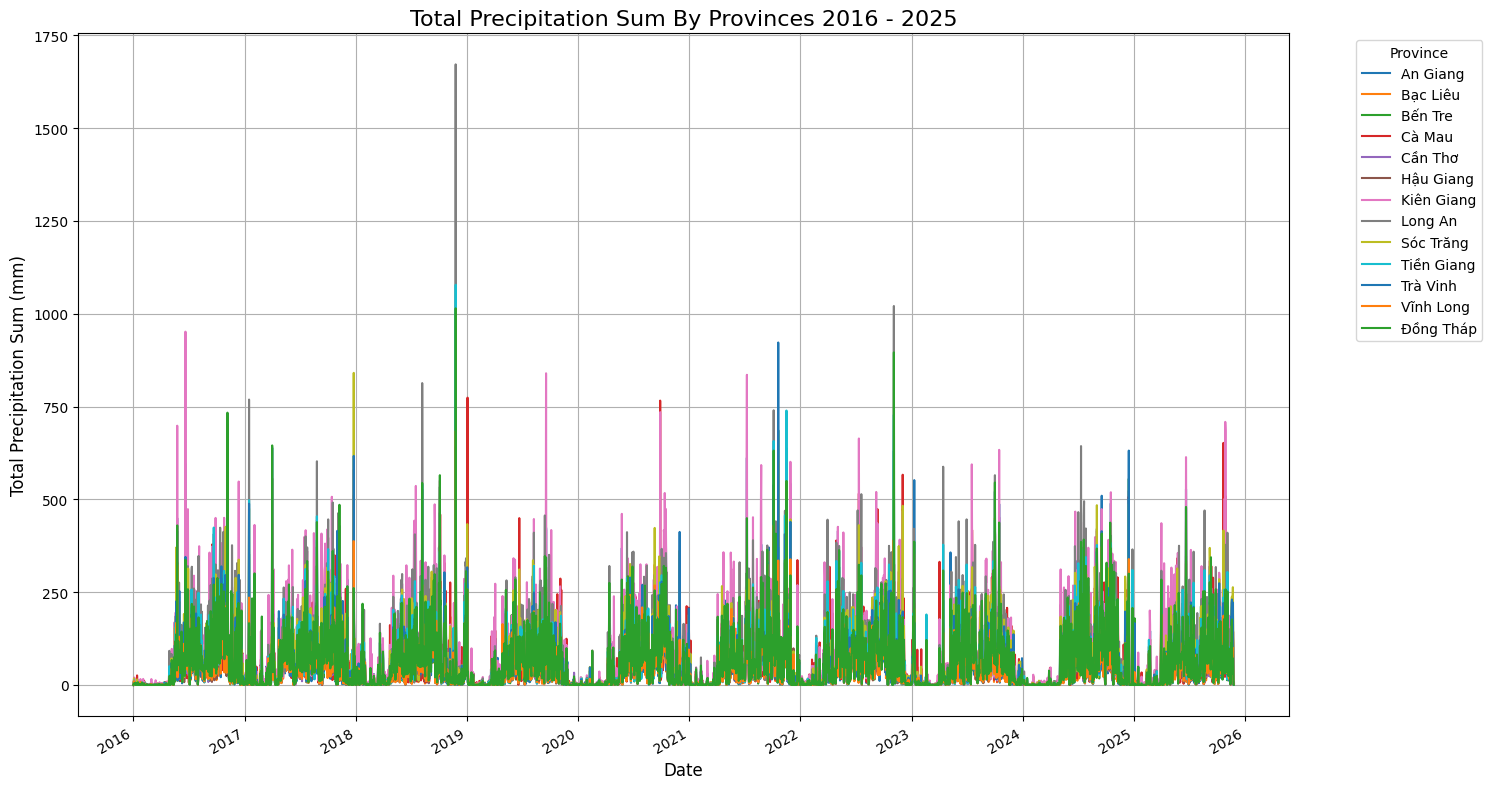

In [11]:
# Create a pivot table for total precipitation sum trends by province
province_precipitation_pivot = era5.pivot_table(
	index='date', 
	columns='NAME_1', 
	values='total_precipitation_sum', 
	aggfunc='sum'
)

# Plot the line graph
plt.figure(figsize=(15, 8))
province_precipitation_pivot.plot(ax=plt.gca(), linewidth=1.5)
plt.title('Total Precipitation Sum By Provinces 2016 - 2025', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Precipitation Sum (mm)', fontsize=12)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')    
plt.grid(True)
plt.tight_layout()
plt.show()


Nhận xét từ 2 plot trên : Dù khoảng cuối năm 2018 lượng mưa theo một số tỉnh nằm ở thượng nguồn sông Cửu Long có xu hướng tăng, nhưng lượng mưa tại ĐBSCL cao nhất là ở năm 2016 - là do lượng mưa ở đa số các tỉnh thành đều cao hơn so với các năm

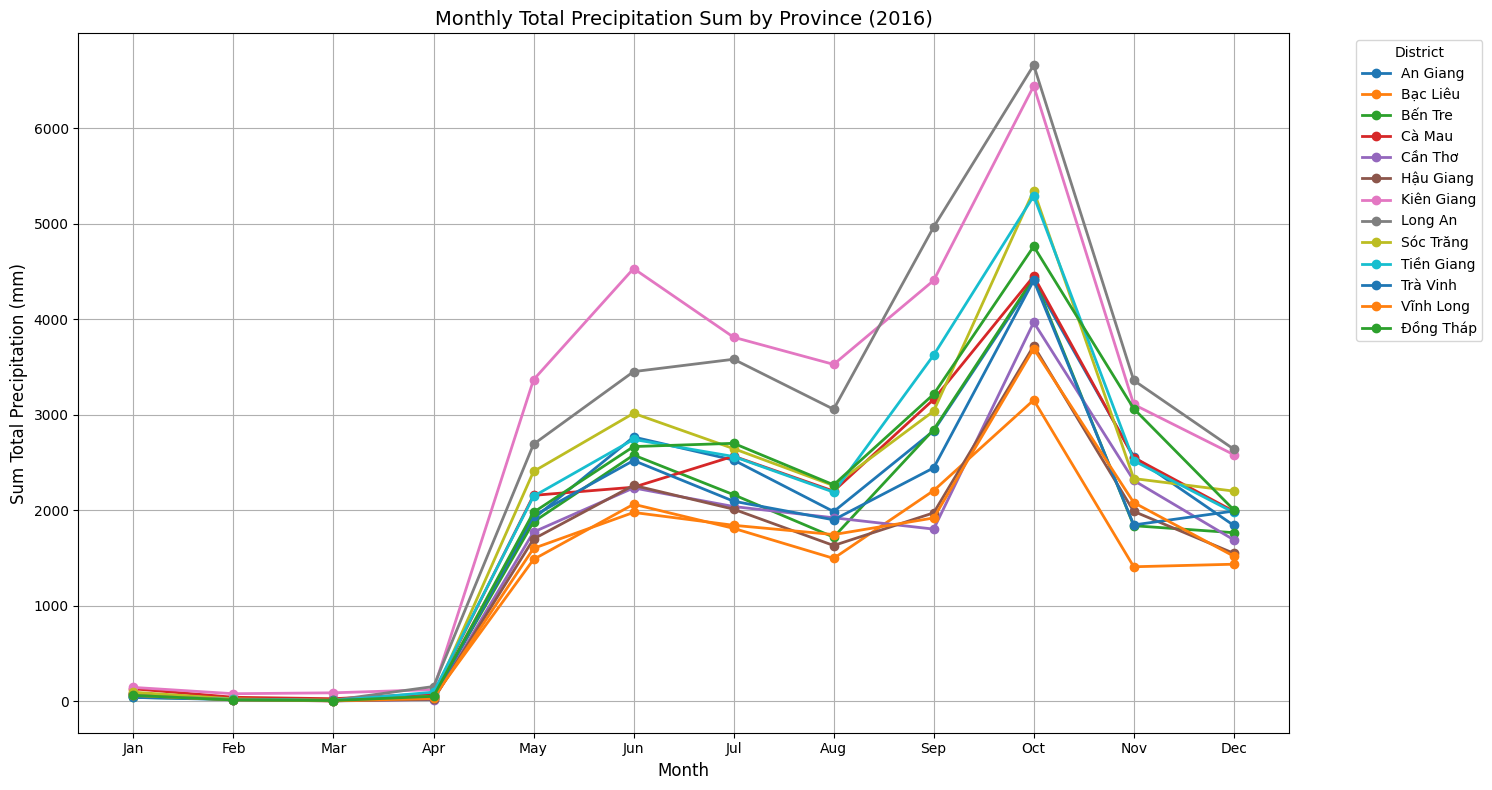

In [13]:
s


/var/folders/36/khn_y8zn7qqflczfpst8cbfc0000gn/T/ipykernel_48575/1190504471.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kien_giang_2016_data['total_precipitation_sum'] = pd.to_numeric(kien_giang_2016_data['total_precipitation_sum'], errors='coerce')


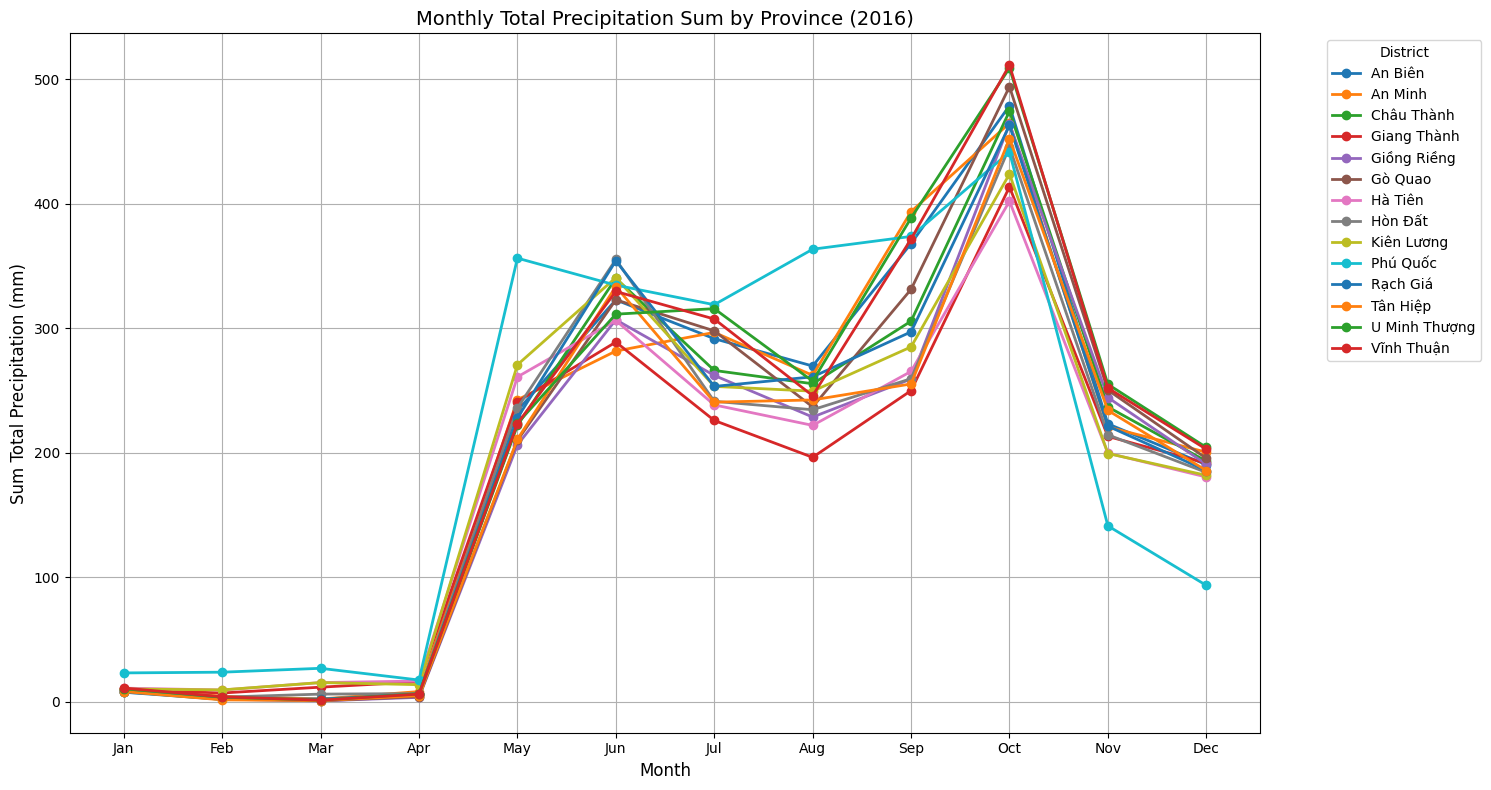

In [31]:
era5['month'] = era5['date'].dt.month
era5['year'] = era5['date'].dt.year
# Filter data for 'Kiên Giang' in the year 2016
kien_giang_2016_data = era5[(era5['NAME_1'] == 'Kiên Giang') & (era5['year'] == 2016)]

# Ensure 'total_precipitation_sum' is numeric
kien_giang_2016_data['total_precipitation_sum'] = pd.to_numeric(kien_giang_2016_data['total_precipitation_sum'], errors='coerce')

# Drop rows with NaN values in 'total_precipitation_sum'
kien_giang_2016_data = kien_giang_2016_data.dropna(subset=['total_precipitation_sum'])

# Group data by district ('NAME_2') and calculate the mean of 'total_precipitation_sum' for each month
district_precipitation = kien_giang_2016_data.groupby(['month', 'NAME_2'])['total_precipitation_sum'].sum().unstack()

# Check if the DataFrame is not empty before plotting
if not district_precipitation.empty:
	# Plot the line graph for each district
	plt.figure(figsize=(15, 8))
	district_precipitation.plot(ax=plt.gca(), linewidth=2, marker='o')
	plt.title('Monthly Total Precipitation Sum by Province (2016)', fontsize=14)
	plt.xlabel('Month', fontsize=12)
	plt.ylabel('Sum Total Precipitation (mm)', fontsize=12)
	plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
	plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
	plt.grid(True)
	plt.tight_layout()
	plt.show()
else:
	print("No data available for plotting.")


Nửa đầu 2016 mưa thấp vì El Niño mạnh → gió mùa Tây Nam yếu → đối lưu giảm → thiếu ẩm từ biển + lưu vực Mekong khô hạn.

**Kết quả:** ĐBSCL gần như không mưa từ tháng 1–6 năm 2016, gây hạn mặn lịch sử.

Tháng 10/2016 ĐBSCL mưa nhiều vì: El Niño kết thúc → La Niña xuất hiện + gió mùa Tây Nam mạnh kéo dài + ảnh hưởng hoàn lưu bão + hiệu ứng đối lưu sau hạn mặn.
→ Kết quả: lượng mưa tháng 10/2016 ở nhiều tỉnh ĐBSCL cao hơn trung bình nhiều năm.

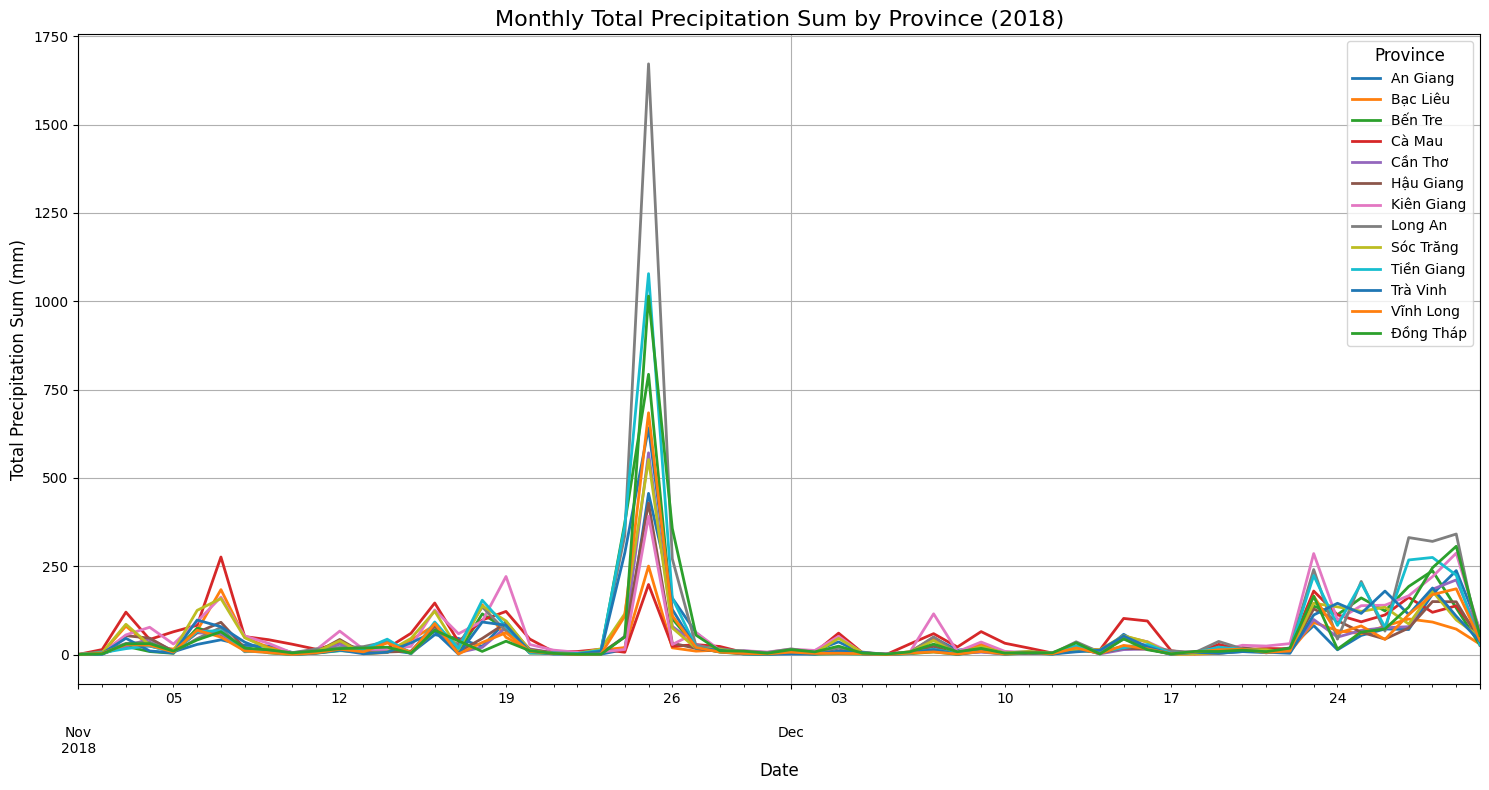

In [14]:
# Filter data for the year 2018 and the specified provinces
data_2018_provinces = era5[(era5['year'] == 2018) & (era5['month'] > 10) & (era5['NAME_1'].isin(era5['NAME_1'].unique().tolist()))]

# Group by date and province, and calculate the total precipitation sum
province_precipitation_2018 = data_2018_provinces.groupby(['date', 'NAME_1'])['total_precipitation_sum'].sum().unstack()

# Plot the line graph
plt.figure(figsize=(15, 8))
province_precipitation_2018.plot(ax=plt.gca(), linewidth=2)
plt.title('Monthly Total Precipitation Sum by Province (2018)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Precipitation Sum (mm)', fontsize=12)
plt.legend(title='Province', fontsize=10, title_fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


1. **Ảnh hưởng của áp thấp nhiệt đới Toraji**

Toraji (giữa tháng 11/2018) tạo ra dải hội tụ ẩm mạnh kéo dài từ Lào – Thái Lan – Campuchia xuống Nam Bộ.

Dải hội tụ này gây mưa to diện rộng trên toàn bộ lưu vực Mekong.

2. **Không khí lạnh từ phía Bắc dồn xuống**

Không khí lạnh tăng cường đẩy vùng mưa lan xa vào nội địa và dịch chuyển xuống phía Nam.

Kết hợp với ẩm từ Toraji → mưa trở nên dai dẳng & trái mùa.

3. **Nhiễu động gió Đông tăng cường**

Gió Đông mang ẩm từ biển vào, gặp không khí lạnh → hình thành các ổ mưa lớn tại thượng nguồn và hạ lưu.

4. **Ảnh hưởng của hệ thống lưu vực Mekong**

Do Mekong chảy theo trục Bắc → Nam, khi khí tượng tạo mưa diện rộng, cả thượng nguồn và ĐBSCL đều bị tác động đồng thời.

Từ các plot trên, ta có thể thấy vào 2016 ( khoảng tháng 5 -6  ) thì Kiên Giang có đợt mưa khá lớn, trong khi ở 2018, các tỉnh nằm ở phía trên của ĐBSCL ( Long An, Đồng Tháp, )

Vào cuối tháng 9 - đầu tháng 10 năm 2018, ở ĐBSCL đã xảy ra lũ lớn bắt nguồn từ các cơn mưa to đột biến. Khi xét rộng về khoảng thời gian của dữ liệu, ta thấy lượng mưa này không phản ánh tổng quát về lượng mưa trung bình hàng năm của khu vực. Có thể sẽ cần phân tích thêm về các yếu tố khí hậu khác như nhiệt độ, độ ẩm và gió để hiểu rõ hơn về xu hướng thời tiết trong khu vực này.

### b. Biến '2m_temperature_mean'

Từ biểu đồ trên, ta có thể thấy nhiệt độ tại ĐBSCL có trung bình cao nhất trong khoảng tháng 4 đến tháng 6 hàng năm, với nhiệt độ trung bình dao động từ khoảng 30 đến 34 độ C. Đây là thời điểm mùa khô trong khu vực, khi ánh nắng mặt trời chiếu sáng mạnh mẽ và ít mưa.

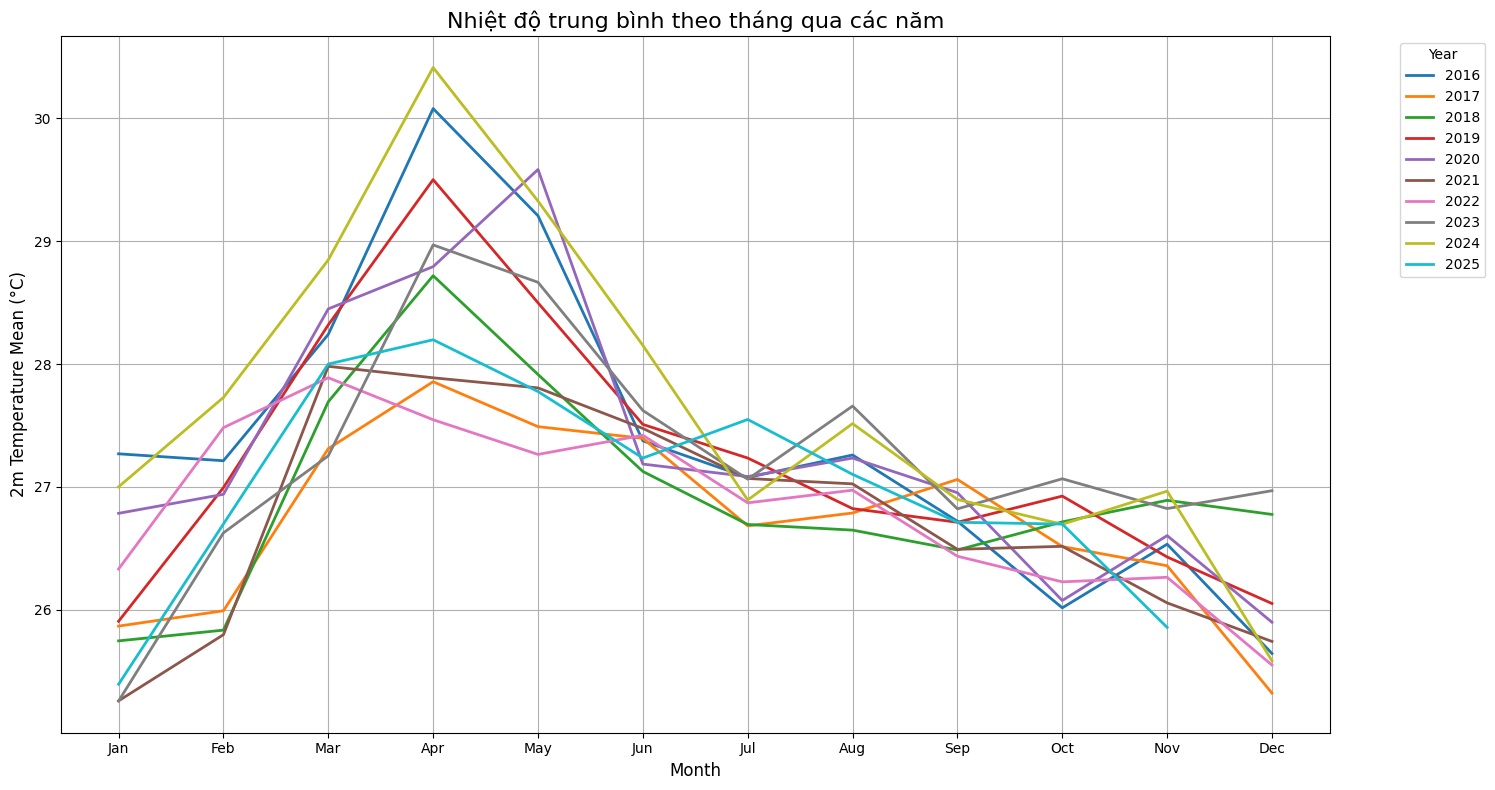

In [15]:
# Group data by month across years and calculate the mean of '2m_temperature_mean'
monthly_temperature_across_years = era5.groupby(['year', 'month'])['2m_temperature_mean'].mean().unstack()

# Plot the data
plt.figure(figsize=(15, 8))
monthly_temperature_across_years.T.plot(ax=plt.gca(), linewidth=2)
plt.title('Nhiệt độ trung bình theo tháng qua các năm', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('2m Temperature Mean (°C)', fontsize=12)
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Năm 2024 ở ĐBSCL nóng “bất thường” vì El Niño mạnh, còn 2025 thì El Niño suy yếu, chuyển sang trung tính rồi nghiêng về La Niña, khiến thời tiết dễ chịu hơn (nhất là đêm, sáng). Nên bạn cảm giác “mát hơn 2024”, dù về dài hạn nhiệt độ vẫn có xu hướng tăng.

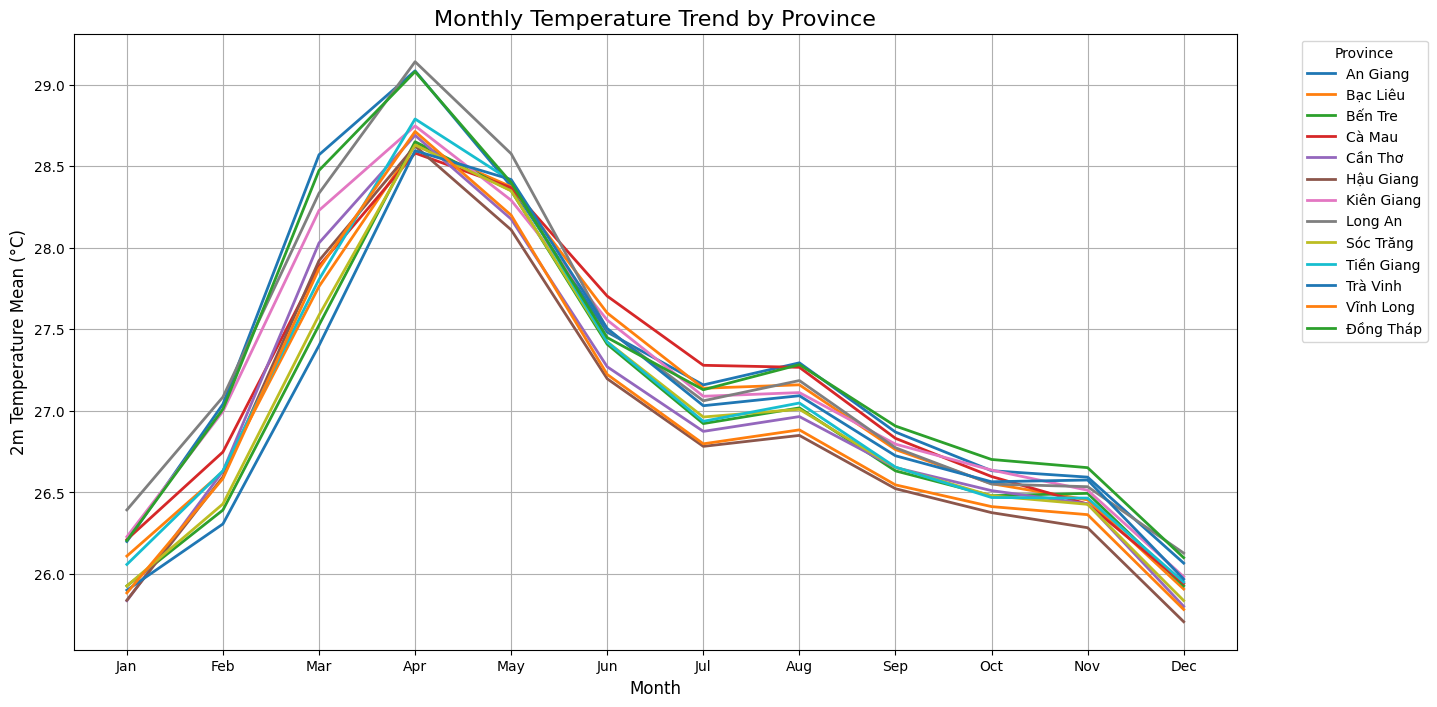

<Figure size 640x480 with 0 Axes>

In [16]:
# Group by 'NAME_1' and 'month', then calculate the mean of '2m_temperature_mean'
monthly_trend_by_province = era5.groupby(['NAME_1', 'month'])['2m_temperature_mean'].mean().unstack()

# Plot the trend for each province
plt.figure(figsize=(15, 8))
monthly_trend_by_province.T.plot(ax=plt.gca(), linewidth=2)
plt.title('Monthly Temperature Trend by Province', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('2m Temperature Mean (°C)', fontsize=12)
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()
plt.tight_layout()


### c. Biến 'surface_pressure_mean'

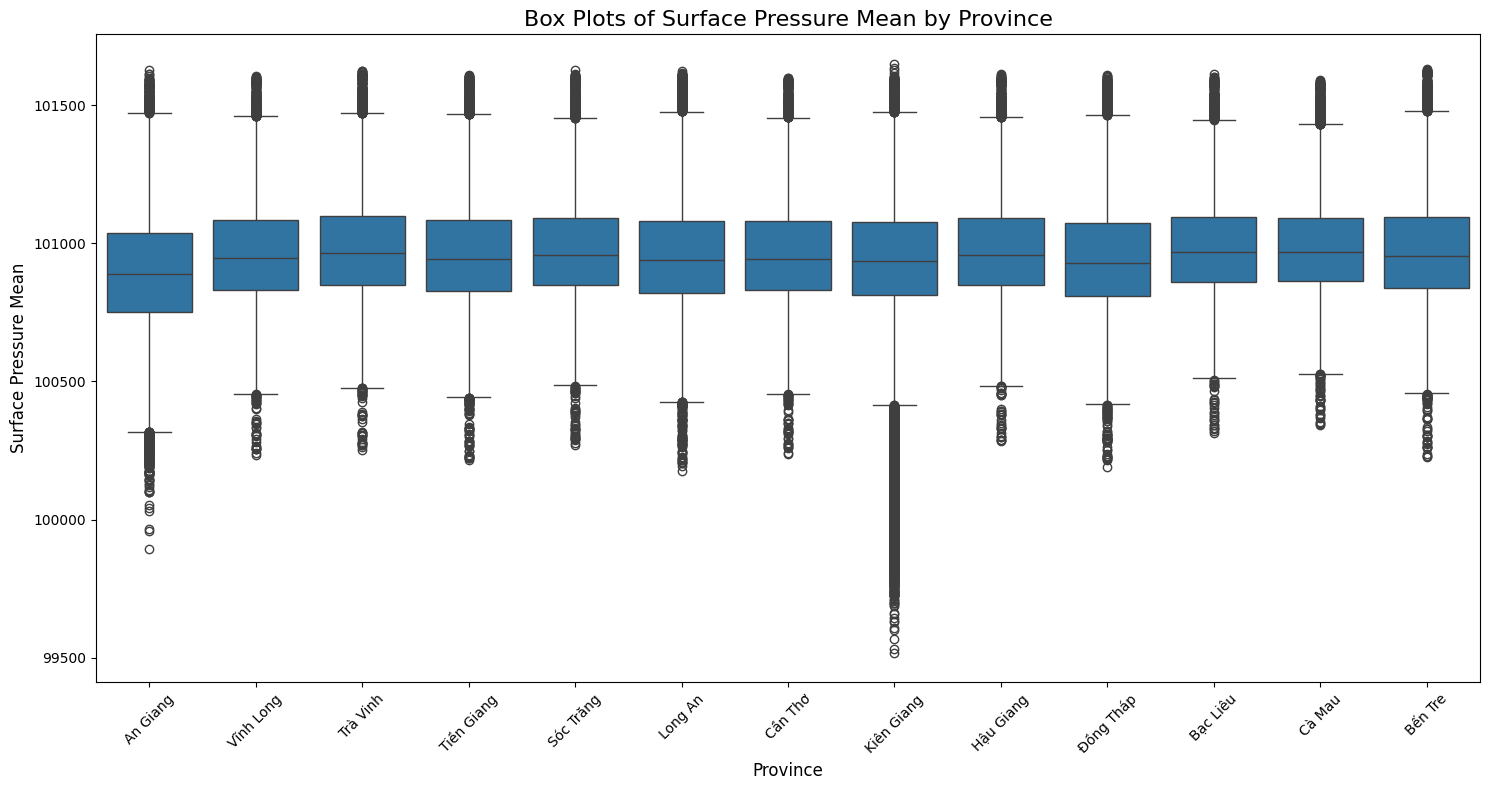

In [17]:
# Plot the box plots for 'surface_pressure_mean' without grouping by month
plt.figure(figsize=(15, 8))
sns.boxplot(data=era5, x='NAME_1', y='surface_pressure_mean')
plt.title('Box Plots of Surface Pressure Mean by Province', fontsize=16)
plt.xlabel('Province', fontsize=12)
plt.ylabel('Surface Pressure Mean', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## **2. Phân tích đa biến**

### a. Biến 'total_evaporation_sum' và 'potential_evaporation_sum'

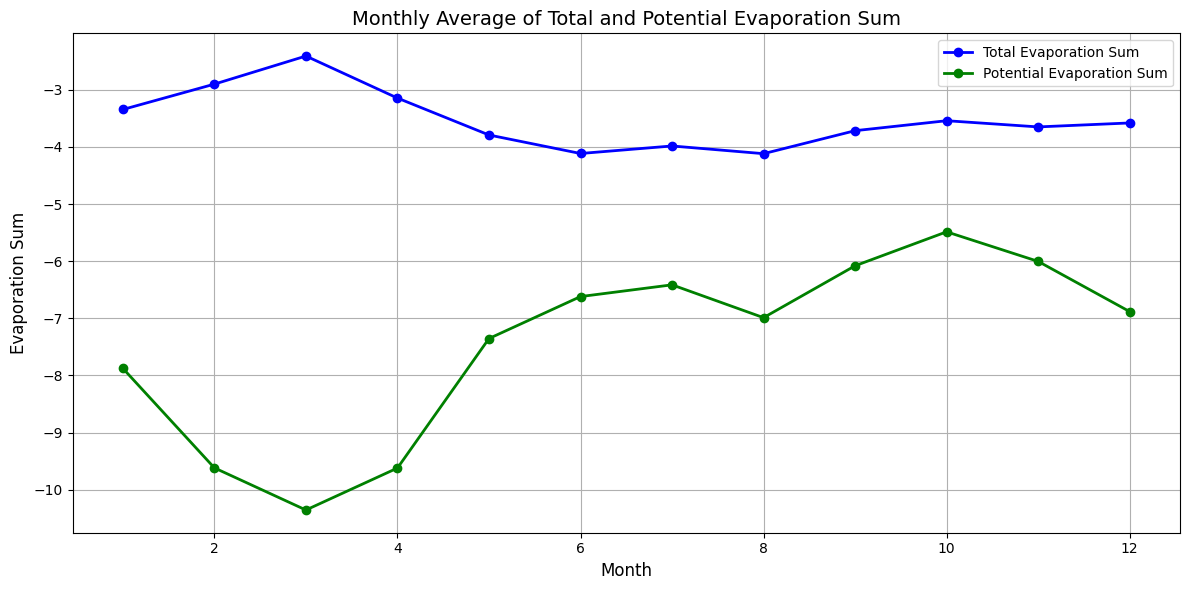

In [21]:
# Select only numeric columns for the calculation
numeric_era5 = era5.select_dtypes(include=['number'])

# Group by 'month' and calculate the mean for numeric columns
monthly_average = numeric_era5.groupby(era5['month']).mean()

# Extract the 'total_evaporation_sum' column
total_evaporation_sum = monthly_average['total_evaporation_sum']

# Extract the 'potential_evaporation_sum' column
potential_evaporation_sum = monthly_average['potential_evaporation_sum']

# Plot the line graph for both 'total_evaporation_sum' and 'potential_evaporation_sum'
plt.figure(figsize=(12, 6))
total_evaporation_sum.plot(kind='line', marker='o', linewidth=2, color='blue', label='Total Evaporation Sum')
potential_evaporation_sum.plot(kind='line', marker='o', linewidth=2, color='green', label='Potential Evaporation Sum')

# Add title and labels
plt.title('Monthly Average of Total and Potential Evaporation Sum', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Evaporation Sum', fontsize=12)

# Add legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/36/khn_y8zn7qqflczfpst8cbfc0000gn/T/ipykernel_48575/2291121335.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20', len(total_evaporation_sum_by_province.columns))


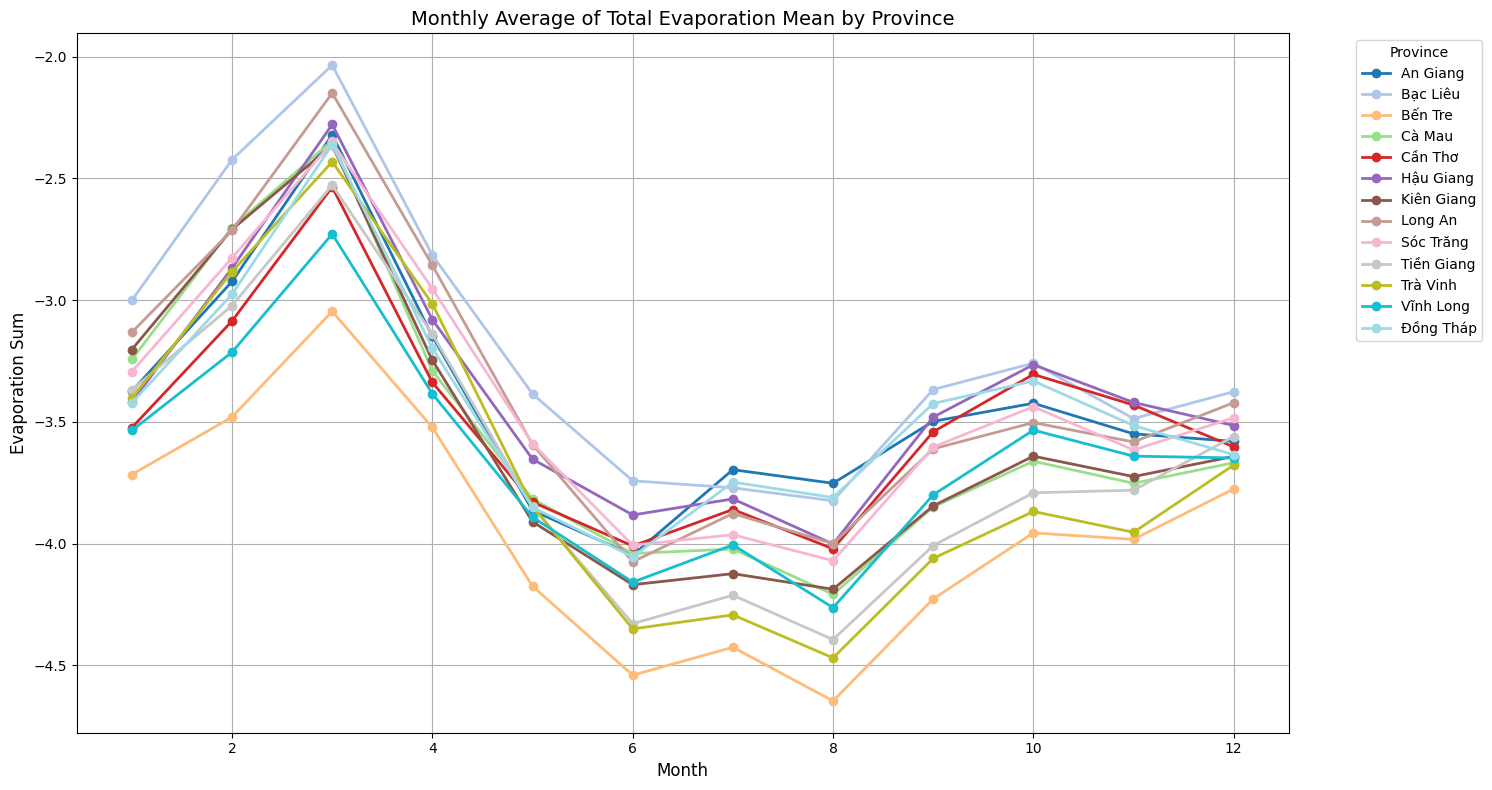

In [24]:
# Group by 'NAME_1' and 'month' and calculate the mean for numeric columns
monthly_average_by_province = era5.groupby(['NAME_1', 'month'])['total_evaporation_sum'].mean()

# Unstack the result to create a DataFrame with 'month' as rows and 'NAME_1' as columns
total_evaporation_sum_by_province = monthly_average_by_province.unstack(level=0)

# Generate a colormap with a unique color for each province
colormap = plt.cm.get_cmap('tab20', len(total_evaporation_sum_by_province.columns))

# Plot the line graph for 'total_evaporation_sum' for each province
plt.figure(figsize=(15, 8))
total_evaporation_sum_by_province.plot(ax=plt.gca(), linewidth=2, marker='o', colormap=colormap)
plt.title('Monthly Average of Total Evaporation Mean by Province', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Evaporation Sum', fontsize=12)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/36/khn_y8zn7qqflczfpst8cbfc0000gn/T/ipykernel_48575/1054734750.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20', len(total_evaporation_sum_by_province.columns))


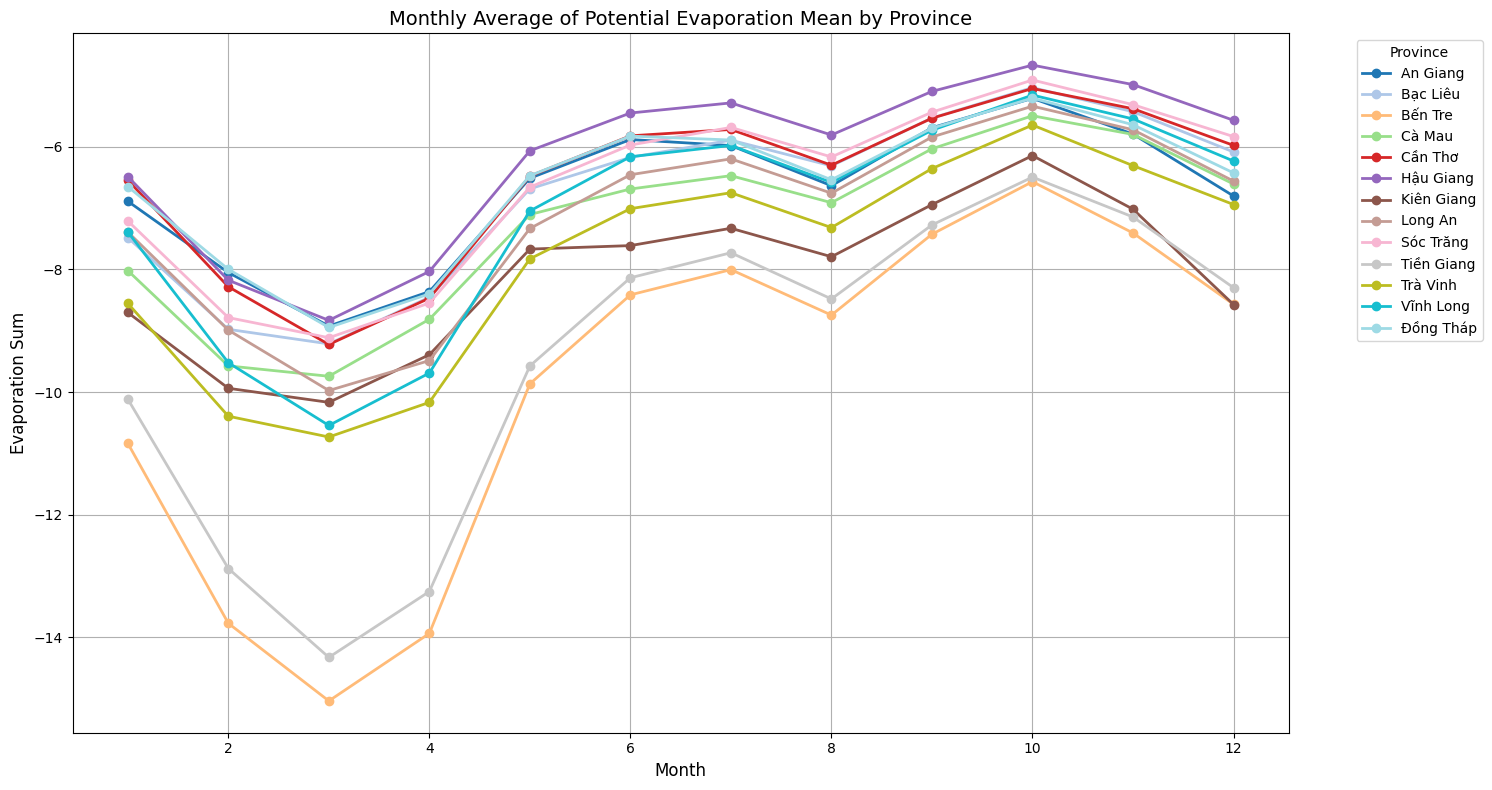

In [23]:
# Group by 'NAME_1' and 'month' and calculate the mean for numeric columns
monthly_average_by_province = era5.groupby(['NAME_1', 'month'])['potential_evaporation_sum'].mean()

# Unstack the result to create a DataFrame with 'month' as rows and 'NAME_1' as columns
total_evaporation_sum_by_province = monthly_average_by_province.unstack(level=0)

# Generate a colormap with a unique color for each province
colormap = plt.cm.get_cmap('tab20', len(total_evaporation_sum_by_province.columns))

# Plot the line graph for 'total_evaporation_sum' for each province
plt.figure(figsize=(15, 8))
total_evaporation_sum_by_province.plot(ax=plt.gca(), linewidth=2, marker='o', colormap=colormap)
plt.title('Monthly Average of Potential Evaporation Mean by Province', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Evaporation Sum', fontsize=12)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


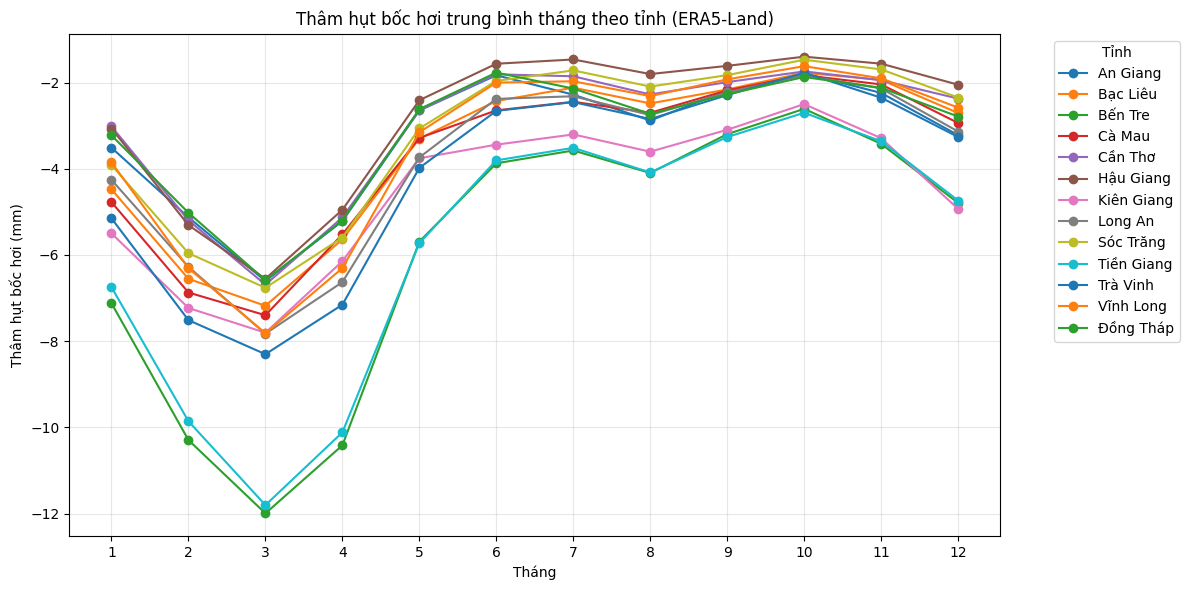

In [34]:
# Thâm hụt bốc hơi (PET - ET)
era5['deficit_mm'] = era5['potential_evaporation_sum'] - era5['total_evaporation_sum']

# =========================
# 3. LẤY THÁNG VÀ GROUP THEO TỈNH + THÁNG
# =========================

# Trung bình theo THÁNG trên toàn bộ chuỗi (climatology)
monthly_clim = (
    era5
    .groupby(['NAME_1', 'month'], as_index=False)
    .agg({
        'potential_evaporation_sum': 'mean',
        'total_evaporation_sum': 'mean',
        'deficit_mm': 'mean'
    })
)
plot_df = monthly_clim.pivot(
    index='month',
    columns='NAME_1',
    values='deficit_mm'
)

# Sắp xếp lại theo tháng cho chắc
plot_df = plot_df.sort_index()

# =========================
# 5. VẼ MULTI-LINE CHART
# =========================

plt.figure(figsize=(12, 6))

for province in plot_df.columns:
    plt.plot(
        plot_df.index,
        plot_df[province],
        marker='o',
        linestyle='-',
        label=province
    )

plt.xlabel('Tháng')
plt.ylabel('Thâm hụt bốc hơi (mm)')
plt.title('Thâm hụt bốc hơi trung bình tháng theo tỉnh (ERA5-Land)')
plt.xticks(range(1, 13))   # Tháng 1–12
plt.grid(True, alpha=0.3)

# Legend nhiều tỉnh thì để bên ngoài cho đỡ chồng
plt.legend(title='Tỉnh', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Bằng cách xem giá trị trung bình của độ thâm hụt bốc hơi giữa thực tế và ước tính, ta có thể đánh giá mức độ khô hạn trong khu vực ĐBSCL. Nếu giá trị này lớn, có nghĩa là mức độ khô hạn cao, có thể ảnh hưởng đến nông nghiệp và nguồn nước. Ngược lại, nếu giá trị này thấp, có thể cho thấy điều kiện ẩm ướt hơn, có lợi cho cây trồng và hệ sinh thái.

Từ biểu đồ, ta có thể thấy Hậu Giang có mức độ khô hạn lớn nhất ở vùng ĐBSCL trong khi các tỉnh như Tiền Giang, Đồng Tháp có mức độ khô hạn thấp hơn. Điều này có thể do sự khác biệt về địa hình, loại đất và các yếu tố khí hậu khác nhau trong khu vực.

### b. Biến 'volumetric_soil_water_layer_1_mean' và 'volumetric_soil_water_layer_2_mean'

In [ ]:
# Tính chênh lệch động
era5["soil_moisture_diff"] = (
    era5["volumetric_soil_water_layer_1_mean"] 
    - era5["volumetric_soil_water_layer_2_mean"]
)


In [36]:
import pandas as pd

era5["date"] = pd.to_datetime(era5[["year", "month"]].assign(day=1))
era5 = era5.sort_values("date")


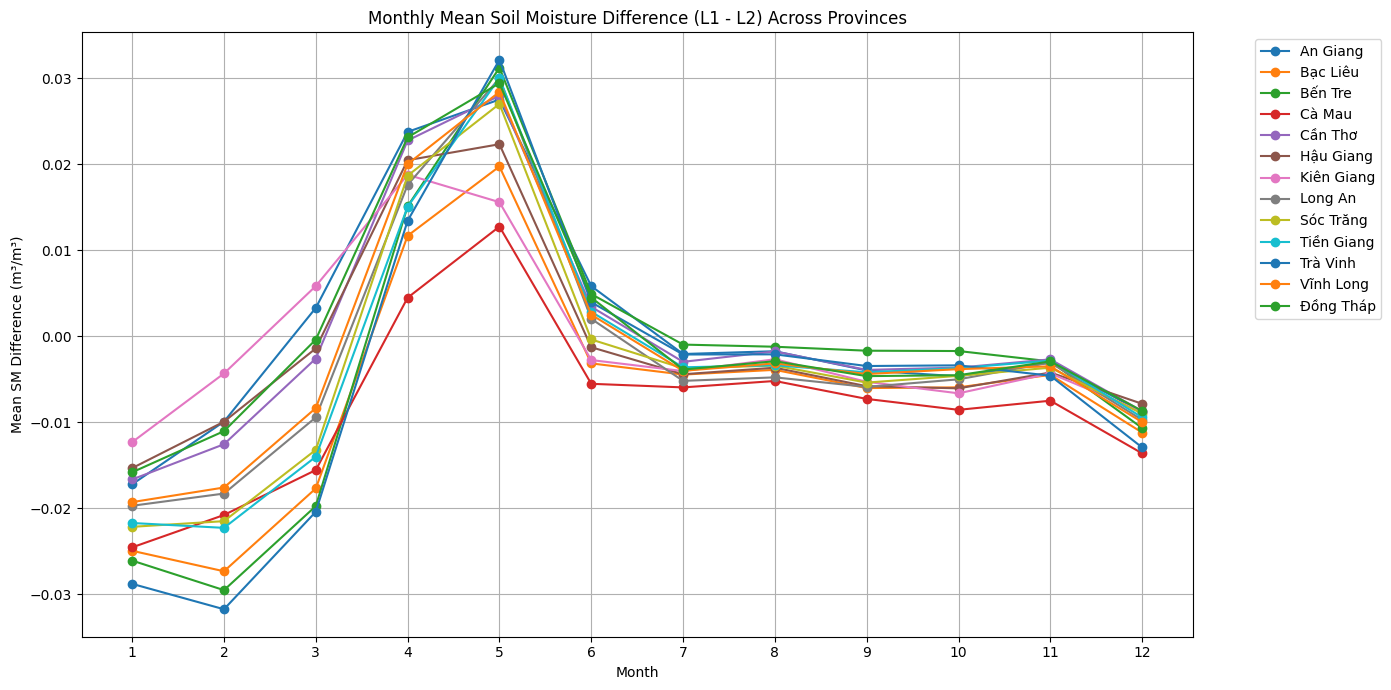

In [40]:
# Nếu chưa có sm_diff thì tạo
era5["sm_diff"] = (
    era5["volumetric_soil_water_layer_1_mean"]
    - era5["volumetric_soil_water_layer_2_mean"]
)

# Tính trung bình theo month và province
monthly_mean = (
    era5.groupby(["NAME_1", "month"])["sm_diff"]
        .mean()
        .reset_index()
)

plt.figure(figsize=(14,7))

for province, df in monthly_mean.groupby("NAME_1"):
    plt.plot(df["month"], df["sm_diff"], marker='o', label=province)

plt.title("Monthly Mean Soil Moisture Difference (L1 - L2) Across Provinces")
plt.xlabel("Month")
plt.ylabel("Mean SM Difference (m³/m³)")
plt.xticks(range(1, 13))  # hiển thị 1–12
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Ở ĐBSCL thì cỡ tháng 4-5 đất có vẻ thẩm thấu kém hơn, điều này là vì:

   + Tầng mặt quá khô, tầng sâu vẫn giữ ẩm → ngăn thấm xuống

   + Đất sét trương nở khi gặp nước nhỏ đầu mùa → đóng mao quản

   + Bốc hơi cực mạnh → nước không kịp thấm

   + Đất nén chặt sau nhiều tháng khô hạn

   + Mưa đầu mùa chưa đủ để “mở đất”

### c. Biến '10m_u_component_of_wind_mean' và '10m_v_component_of_wind_mean'

In [49]:
# Gộp tất cả tỉnh lại, lấy trung bình theo year-month
wind_region = (
    era5.groupby(["year", "month"])[
        ["10m_u_component_of_wind_mean", "10m_v_component_of_wind_mean"]
    ]
    .mean()
    .reset_index()
)

# Tạo cột date để plot theo thời gian (lấy ngày 1 cho mỗi tháng)
wind_region["date"] = pd.to_datetime(wind_region[["year", "month"]].assign(day=1))
wind_region = wind_region.sort_values("date")


In [52]:
import numpy as np

u = wind_region["10m_u_component_of_wind_mean"]
v = wind_region["10m_v_component_of_wind_mean"]

# Tốc độ gió
wind_region["wind_speed"] = np.sqrt(u**2 + v**2)

# Hướng gió (meteorological, FROM)
# atan2(-u, -v): đổi từ vector "thổi tới" (u,v) sang vector "thổi từ"
wind_dir_rad = np.arctan2(-u, -v)
wind_region["wind_dir_deg"] = (wind_dir_rad * 180 / np.pi) % 360


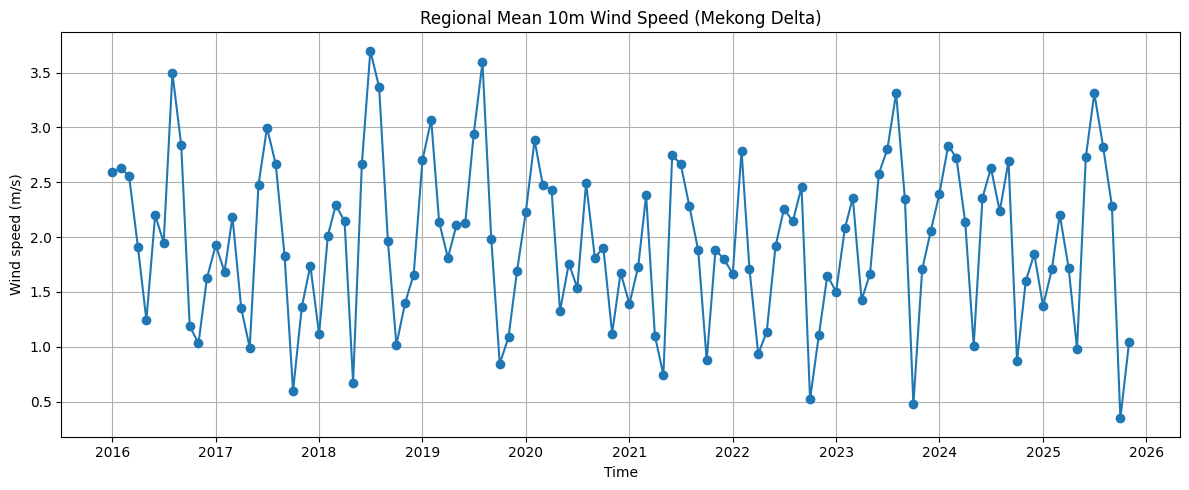

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(wind_region["date"], wind_region["wind_speed"], marker="o")
plt.title("Regional Mean 10m Wind Speed (Mekong Delta)")
plt.xlabel("Time")
plt.ylabel("Wind speed (m/s)")
plt.grid(True)
plt.tight_layout()
plt.show()


Từ biểu đồ trên ta có thể thấy gió thường thổi mạnh vào ĐBSCL vào khoảng tháng 5 đến tháng 10 hàng năm, với vận tốc gió trung bình dao động từ khoảng 2 đến 6 m/s. Đây là thời điểm mùa mưa trong khu vực, khi gió mùa Tây Nam thổi vào mang theo độ ẩm từ biển.

In [57]:
import numpy as np

u = era5["10m_u_component_of_wind_mean"]
v = era5["10m_v_component_of_wind_mean"]

# Tốc độ gió (không bắt buộc cho wind rose đơn giản)
wind_speed = np.sqrt(u**2 + v**2)

# Hướng gió (meteorological: FROM direction)
wind_dir_rad = np.arctan2(-u, -v)
wind_dir_deg = (wind_dir_rad * 180 / np.pi) % 360


In [59]:
# 16 sector, mỗi sector 22.5°
dir_bins = np.arange(0, 361, 22.5)  # 0, 22.5, 45, ..., 360

hist, bin_edges = np.histogram(wind_dir_deg, bins=dir_bins)

# Tần suất (chuẩn hoá về 0–1, có thể đổi ra %)
freq = hist / hist.sum()

# Góc trung tâm của mỗi sector (để vẽ bar)
dir_centers_deg = (bin_edges[:-1] + bin_edges[1:]) / 2
dir_centers_rad = np.deg2rad(dir_centers_deg)


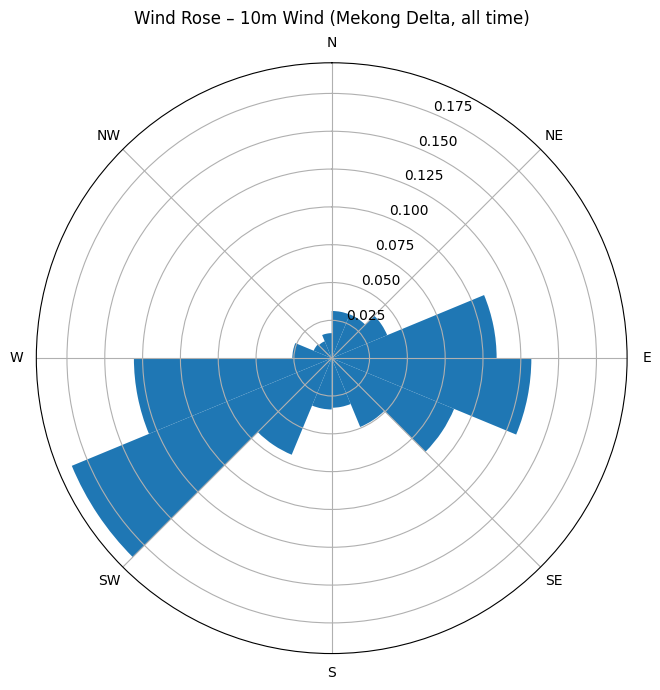

In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)

width = np.deg2rad(22.5)  # độ rộng mỗi sector (rad)

bars = ax.bar(dir_centers_rad, freq, width=width, bottom=0.0, align="center")

# Cài đặt hướng trục giống khí tượng
ax.set_theta_zero_location("N")   # 0° ở hướng Bắc
ax.set_theta_direction(-1)        # chiều kim đồng hồ

# Đổi nhãn trục góc thành hướng gió
ax.set_xticks(np.deg2rad([0, 45, 90, 135, 180, 225, 270, 315]))
ax.set_xticklabels(["N", "NE", "E", "SE", "S", "SW", "W", "NW"])

# Đổi nhãn trục bán kính thành %
# ax.set_yticklabels([f"{x:.0f}%" for x in ax.get_yticks() * 100])

ax.set_title("Wind Rose – 10m Wind (Mekong Delta, all time)", va="bottom")

plt.tight_layout()
plt.show()


Gió thường thổi vào ĐBSCL là gió mùa Tây Nam, lý do là vì: 
+ Địa hình trũng rộng → ít cản gió

+ Mở ra vịnh Thái Lan → nhận trực tiếp gió Tây Nam ẩm

+ Xa dãy núi chắn gió → gió đi sâu vào nội đồng

+ Hiệu ứng gió biển – gió đất tăng cường

### d. Biến 'surface_net_solar_radiation_sum' và 'surface_solar_radiation_downwards_sum'

In [62]:
solar_mean = (
    era5.groupby(["NAME_1", "month"])[
        ["surface_net_solar_radiation_sum", "surface_solar_radiation_downwards_sum"]
    ]
    .mean()
    .reset_index()
)


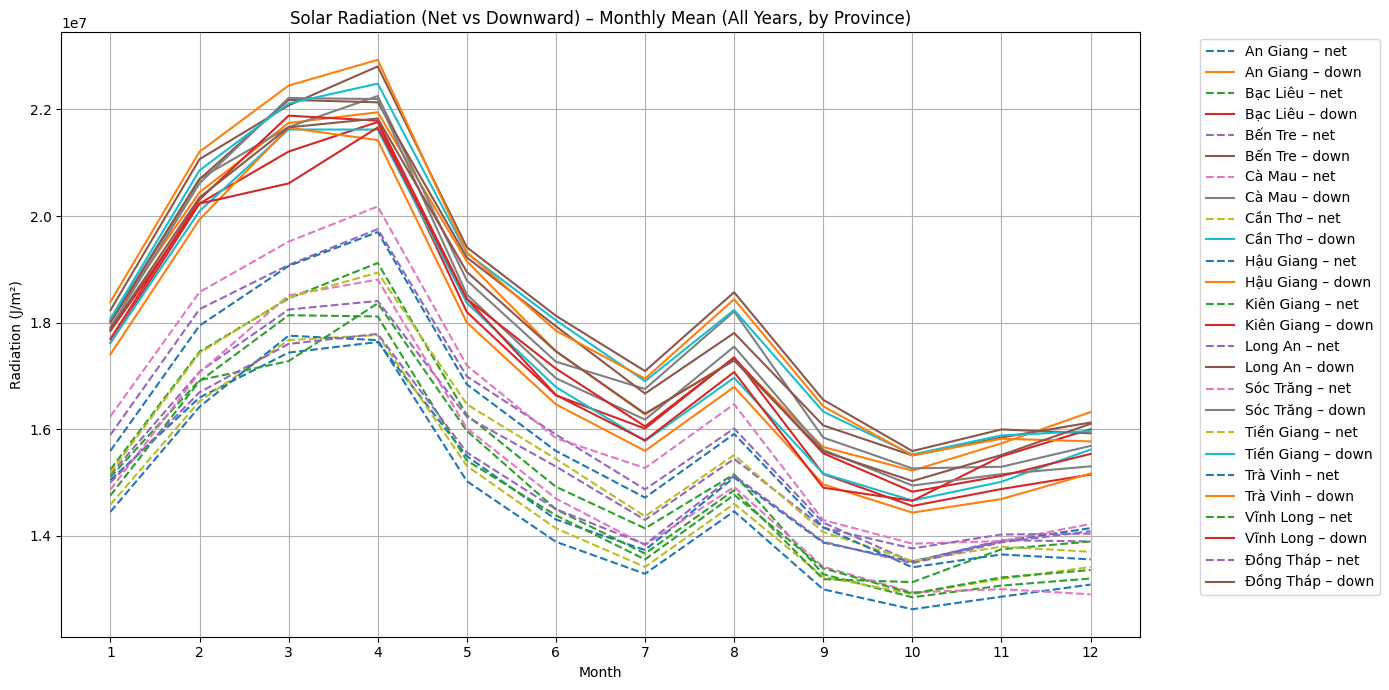

In [64]:
plt.figure(figsize=(14,7))

for province, df in solar_mean.groupby("NAME_1"):
    plt.plot(df["month"], df["surface_net_solar_radiation_sum"],
             linestyle="--", label=f"{province} – net")
    plt.plot(df["month"], df["surface_solar_radiation_downwards_sum"],
             linestyle="-", label=f"{province} – down")

plt.title("Solar Radiation (Net vs Downward) – Monthly Mean (All Years, by Province)")
plt.xlabel("Month")
plt.ylabel("Radiation (J/m²)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Việc bức xạ nhiệt khá lớn vào khoảng tháng 2 - 4 lý giải cho việc ĐBSCL thường rất nóng vào mùa khô, đặc biệt là trong các tháng trước khi mùa mưa bắt đầu. Điều này có thể ảnh hưởng đến nông nghiệp và sinh hoạt hàng ngày của người dân trong khu vực.

Ngoài ra, nắng vào tháng 2 - 4 còn khiến cho đất bề mặt bị khô cằn, ảnh hưởng trực tiếp tới mức độ thẩm thấu nước vào tháng 5 - 6 như đã phân tích ở trên.